In [68]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

In [69]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [70]:
df1 = pd.read_csv('https://raw.githubusercontent.com/Mateusz-Matejko/data-science-bootcamp/main/VIII-clasification/data/df1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Mateusz-Matejko/data-science-bootcamp/main/VIII-clasification/data/df2.csv')



In [71]:
df1.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,7956.865588,416.187458,801.017982,33339.433356,2.909867,1.0,2.719263,65.977073,2.739492,2.053495,2.724882,6468.496067,14276.196898,2.681726
std,17226.922333,1566.205147,405.605362,145352.131423,1.025184,0.0,1.093263,20.277369,0.712660,1.102979,1.107453,4682.905422,7149.079135,2.487077
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000
25%,1735.000000,31.000000,458.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2899.000000,7973.000000,1.000000
50%,5902.000000,36.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4876.000000,14218.000000,2.000000
75%,7014.000000,45.000000,1162.000000,17.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,4.000000,8346.000000,20471.000000,4.000000
max,100146.000000,9890.000000,1499.000000,999590.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000


In [72]:
df2.describe()

,EmployeeNumber,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,7956.865588,15.187683,3.148573,2.725556,80.0,0.785795,342.691616,2.808946,2.764217,302.743313,355.125646,385.886716,323.842886,77621.952798
std,17226.922333,3.642842,0.355707,1.080807,0.0,0.848038,1484.151875,1.306080,0.710859,1352.211854,1456.887417,1572.914217,1409.370519,56194.865060
min,1.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,1735.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34788.000000
50%,5902.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58512.000000
75%,7014.000000,18.000000,3.000000,4.000000,80.0,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,100152.000000
max,100146.000000,25.000000,4.000000,4.000000,80.0,3.000000,9939.000000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000,239988.000000


In [73]:
df1.head()
df1.shape

(4449, 20)

In [74]:
df2.head()
df2.shape

(4449, 17)

In [75]:
df3=pd.merge(df1,df2, on='EmployeeNumber', how='outer')
df3.shape

(4449, 36)

In [76]:
df3.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [77]:
df3.describe(include='all')

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
count,4449.000000,4449.000000,4449,4449.000000,4449,4449.000000,4449.000000,4449,4449.0,4449.000000,4449,4449.000000,4449.000000,4449.000000,4449,4449.000000,4449,4449.000000,4449.000000,4449.000000,4449,4449,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4302,4449.000000
unique,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN
freq,NaN,NaN,3147,NaN,2916,NaN,NaN,1823,NaN,NaN,2681,NaN,NaN,NaN,983,NaN,2074,NaN,NaN,NaN,4449,3186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2222,NaN
mean,7956.865588,416.187458,NaN,801.017982,NaN,33339.433356,2.909867,NaN,1.0,2.719263,NaN,65.977073,2.739492,2.053495,NaN,2.724882,NaN,6468.496067,14276.196898,2.681726,NaN,NaN,15.187683,3.148573,2.725556,80.0,0.785795,342.691616,2.808946,2.764217,302.743313,355.125646,385.886716,323.842886,NaN,77621.952798
std,17226.922333,1566.205147,NaN,405.605362,NaN,145352.131423,1.025184,NaN,0.0,1.093263,NaN,20.277369,0.712660,1.102979,NaN,1.107453,NaN,4682.905422,7149.079135,2.487077,NaN,NaN,3.642842,0.355707,1.080807,0.0,0.848038,1484.151875,1.306080,0.710859,1352.211854,1456.887417,1572.914217,1409.370519,NaN,56194.865060
min,1.000000,18.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,12108.000000
25%,1735.000000,31.000000,NaN,458.000000,NaN,2.000000,2.000000,NaN,1.0,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2899.000000,7973.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,NaN,34788.000000
50%,5902.000000,36.000000,NaN,804.000000,NaN,8.000000,3.000000,NaN,1.0,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4876.000000,14218.000000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,NaN,58512.000000
75%,7014.000000,45.000000,NaN,1162.000000,NaN,17.000000,4.000000,NaN,1.0,4.000000,NaN,84.000000,3.000000,3.000000,NaN,4.000000,NaN,8346.000000,20471.000000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,NaN,100152.000000


In [78]:
# ''' 'Age', 'DistanceFromHome',
#        'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
#        'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
#        'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
#        'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
#        'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
#        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
#        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
#        'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
#        'YearlyIncome' '''

In [79]:
df3.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,7956.865588,416.187458,801.017982,33339.433356,2.909867,1.0,2.719263,65.977073,2.739492,2.053495,2.724882,6468.496067,14276.196898,2.681726,15.187683,3.148573,2.725556,80.0,0.785795,342.691616,2.808946,2.764217,302.743313,355.125646,385.886716,323.842886,77621.952798
std,17226.922333,1566.205147,405.605362,145352.131423,1.025184,0.0,1.093263,20.277369,0.712660,1.102979,1.107453,4682.905422,7149.079135,2.487077,3.642842,0.355707,1.080807,0.0,0.848038,1484.151875,1.306080,0.710859,1352.211854,1456.887417,1572.914217,1409.370519,56194.865060
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,1735.000000,31.000000,458.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2899.000000,7973.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34788.000000
50%,5902.000000,36.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4876.000000,14218.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58512.000000
75%,7014.000000,45.000000,1162.000000,17.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,4.000000,8346.000000,20471.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,100152.000000
max,100146.000000,9890.000000,1499.000000,999590.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,9939.000000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000,239988.000000


In [80]:
pd.set_option("display.max_columns", 50)

In [81]:
df3.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,7956.865588,416.187458,801.017982,33339.433356,2.909867,1.0,2.719263,65.977073,2.739492,2.053495,2.724882,6468.496067,14276.196898,2.681726,15.187683,3.148573,2.725556,80.0,0.785795,342.691616,2.808946,2.764217,302.743313,355.125646,385.886716,323.842886,77621.952798
std,17226.922333,1566.205147,405.605362,145352.131423,1.025184,0.0,1.093263,20.277369,0.712660,1.102979,1.107453,4682.905422,7149.079135,2.487077,3.642842,0.355707,1.080807,0.0,0.848038,1484.151875,1.306080,0.710859,1352.211854,1456.887417,1572.914217,1409.370519,56194.865060
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,1735.000000,31.000000,458.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2899.000000,7973.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34788.000000
50%,5902.000000,36.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4876.000000,14218.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58512.000000
75%,7014.000000,45.000000,1162.000000,17.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,4.000000,8346.000000,20471.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,100152.000000
max,100146.000000,9890.000000,1499.000000,999590.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,9939.000000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000,239988.000000


In [82]:
columns_to_plot = [ 'EmployeeNumber',	'Age',	'DailyRate',	'DistanceFromHome',	'Education',	'EmployeeCount',	'EnvironmentSatisfaction',	'HourlyRate',	'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'PercentSalaryHike',	'PerformanceRating',	'RelationshipSatisfaction',	'StandardHours',	'StockOptionLevel',	'TotalWorkingYears',	'TrainingTimesLastYear',	'WorkLifeBalance',	'YearsAtCompany',	'YearsInCurrentRole',	'YearsSinceLastPromotion',	'YearsWithCurrManager',	'YearlyIncome']

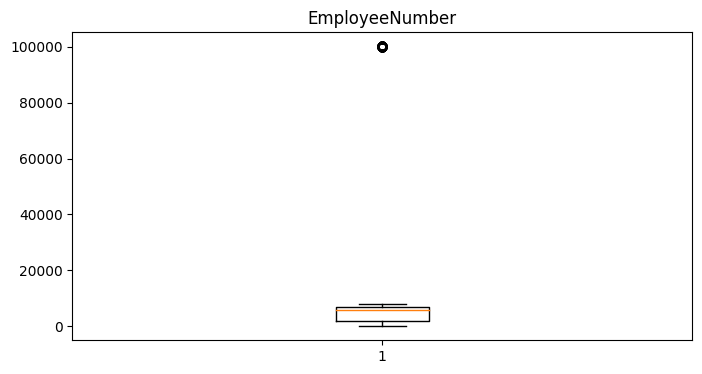

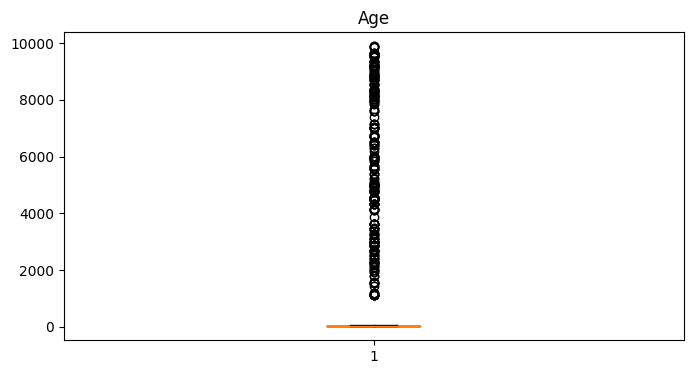

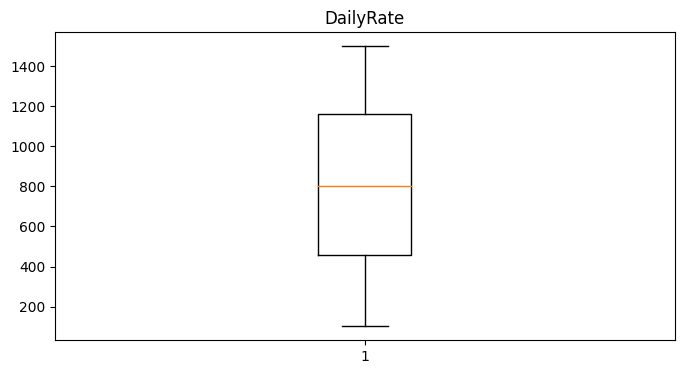

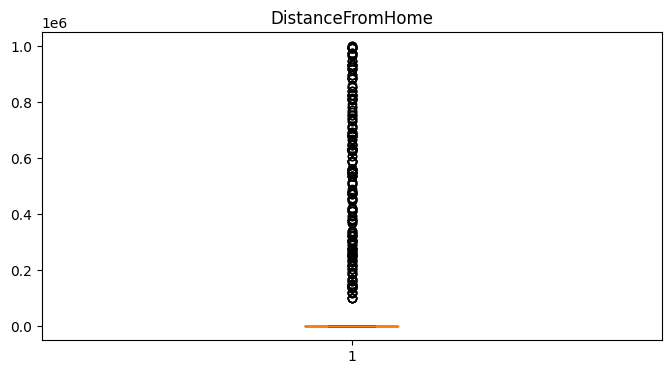

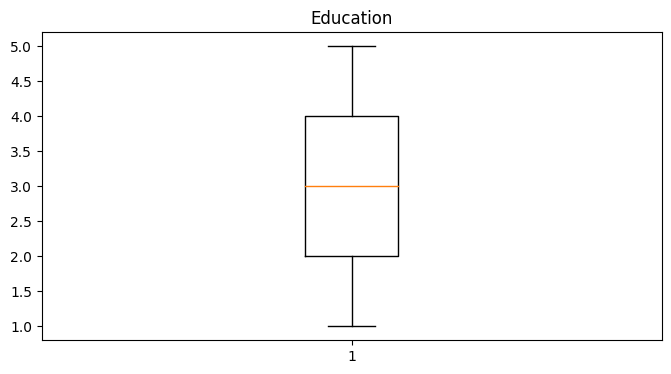

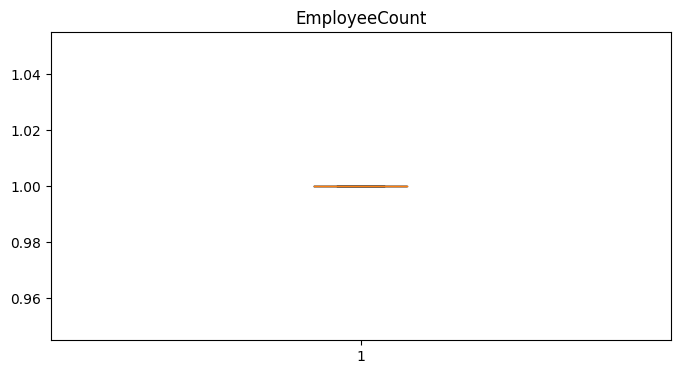

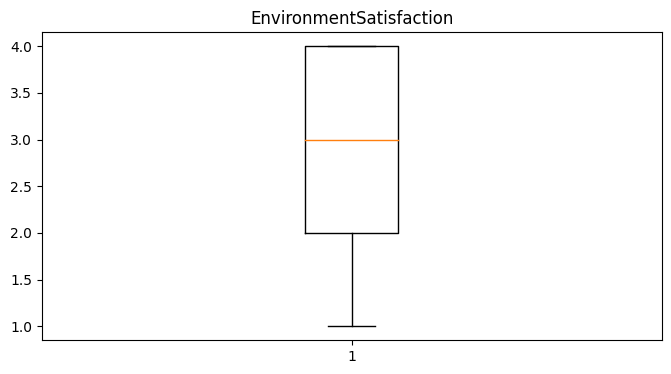

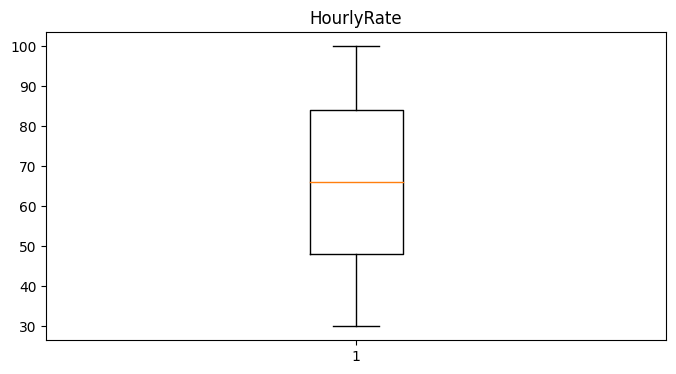

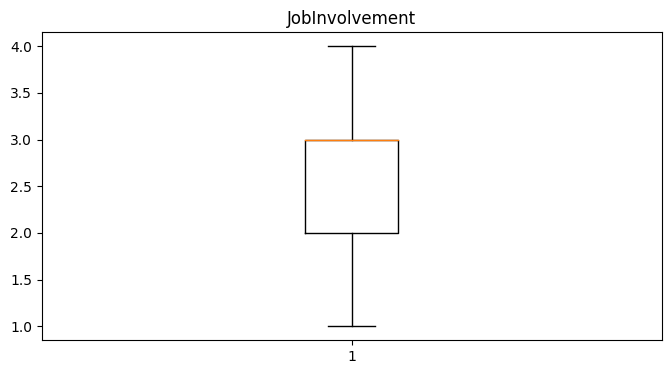

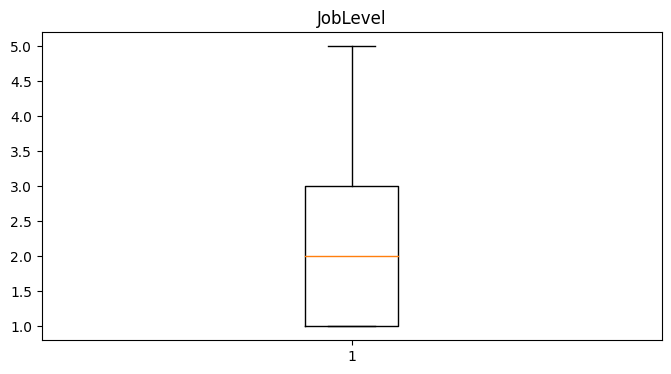

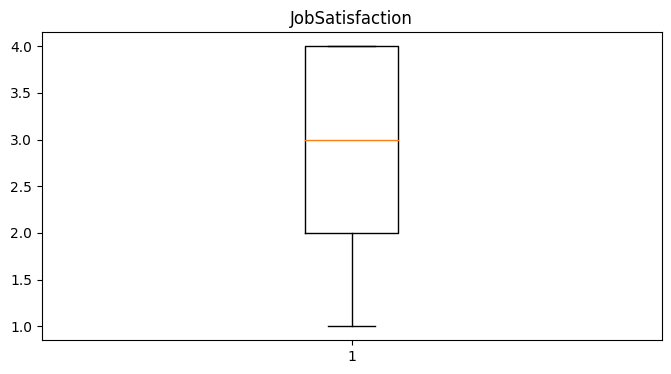

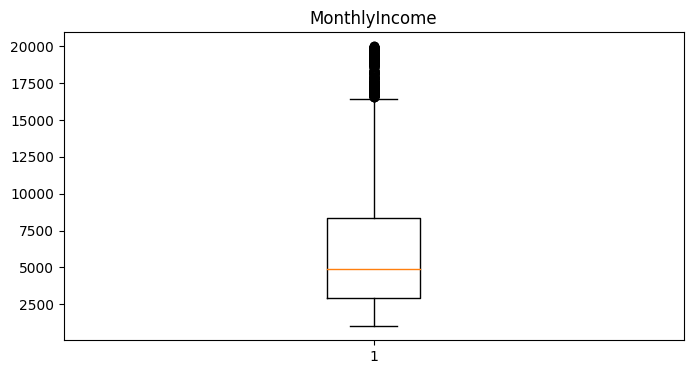

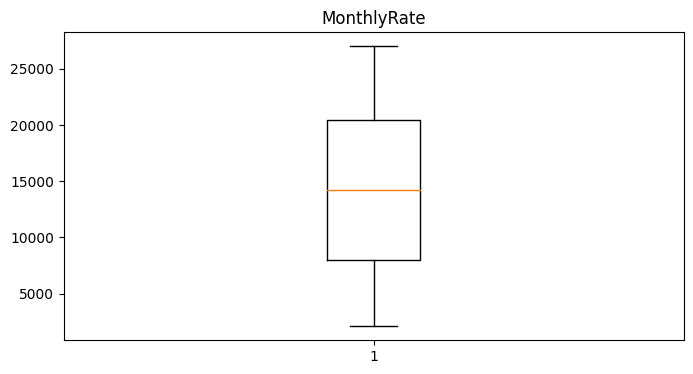

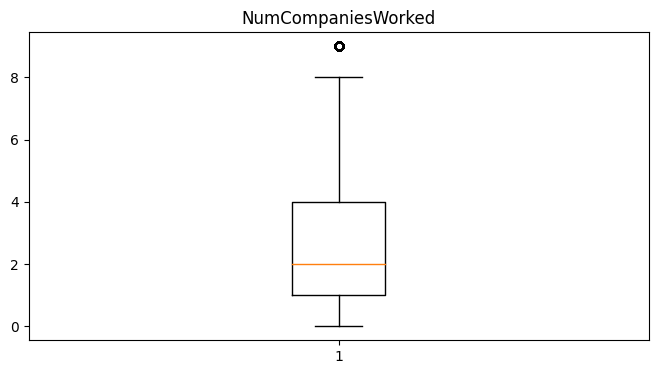

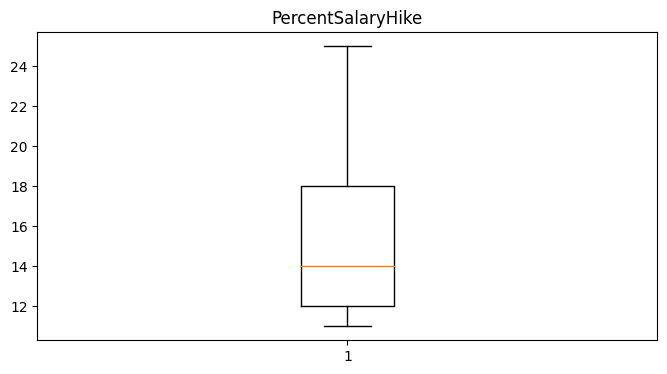

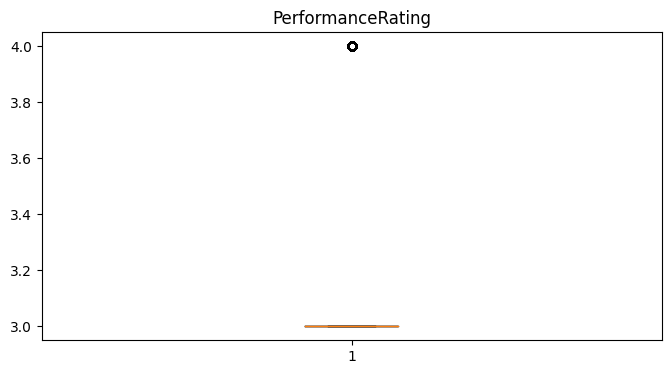

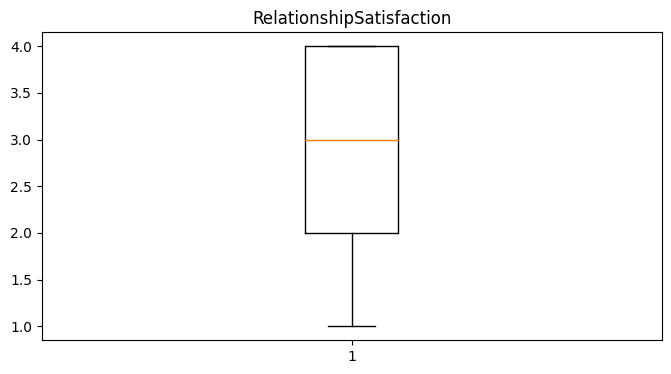

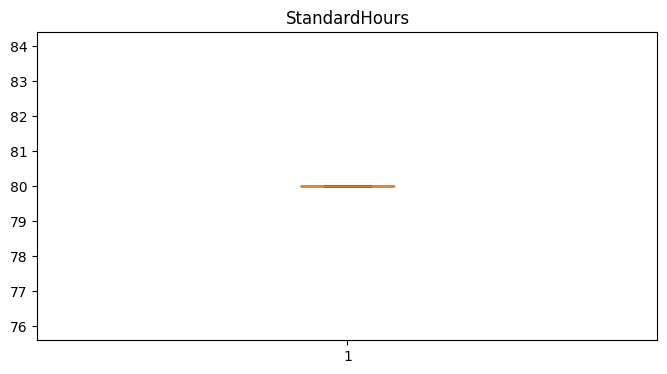

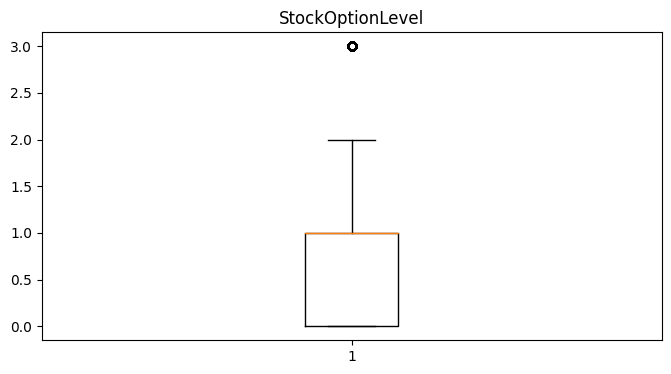

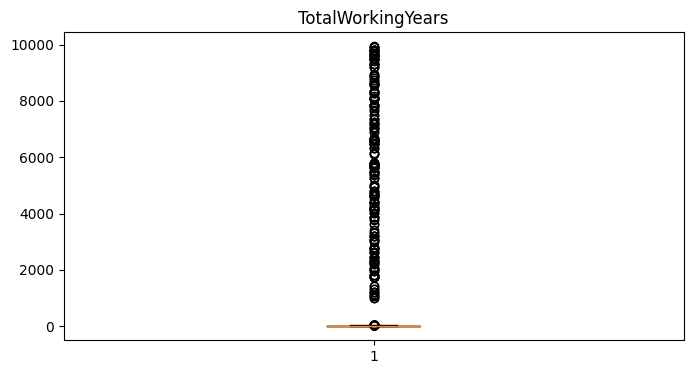

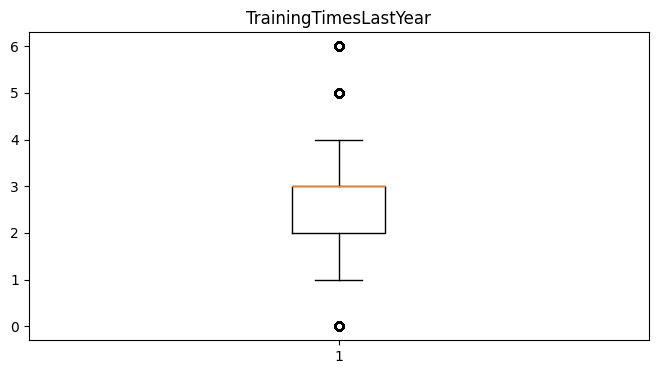

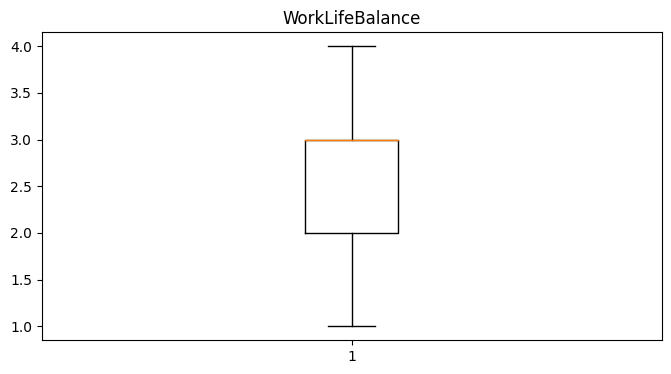

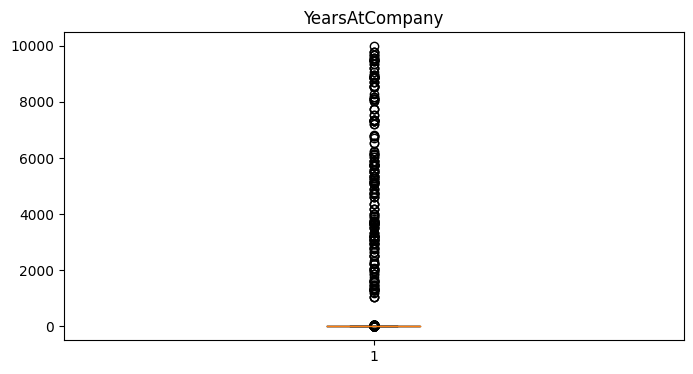

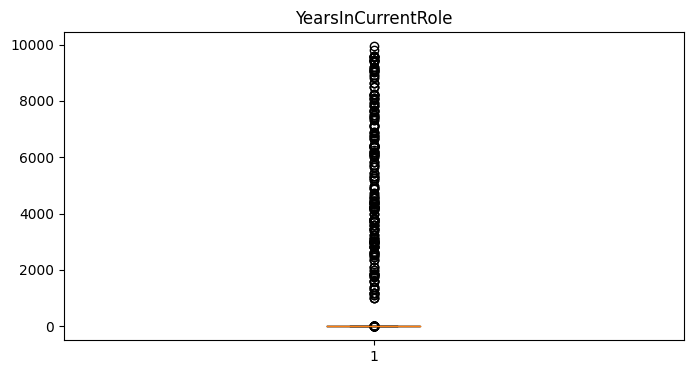

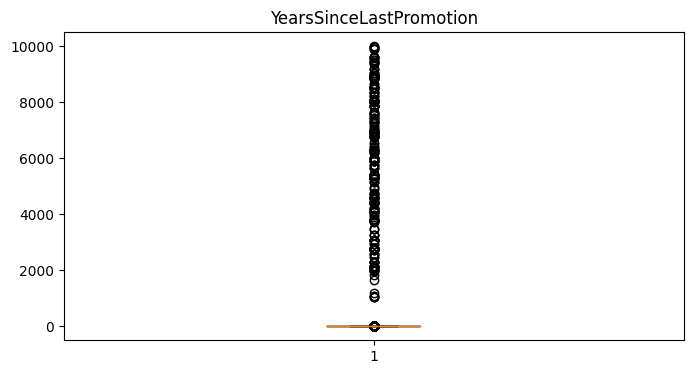

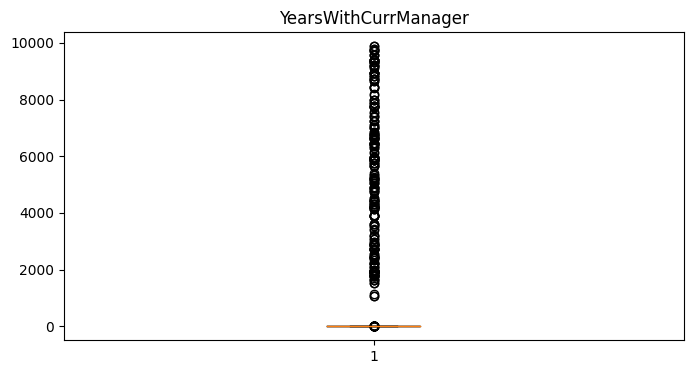

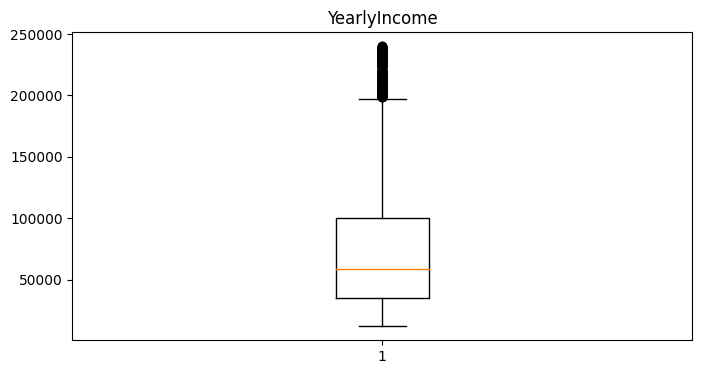

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Twój DataFrame zawierający wymienione kolumny

# Lista kolumn, dla których chcesz wykonać wykres pudełkowy
columns_to_plot = [ 'EmployeeNumber',	'Age',	'DailyRate',	'DistanceFromHome',	'Education',	
                   'EmployeeCount',	'EnvironmentSatisfaction',	'HourlyRate',	'JobInvolvement',	
                   'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	
                   'PercentSalaryHike',	'PerformanceRating',	'RelationshipSatisfaction',	'StandardHours',	
                   'StockOptionLevel',	'TotalWorkingYears',	'TrainingTimesLastYear',	'WorkLifeBalance',	
                   'YearsAtCompany',	'YearsInCurrentRole',	'YearsSinceLastPromotion',	'YearsWithCurrManager',	
                   'YearlyIncome']

# Wykres pudełkowy dla każdej kolumny
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))  # Rozmiar wykresu (opcjonalne)
    plt.boxplot(df3[column].dropna())  # Wykres pudełkowy
    plt.title(column)  # Tytuł wykresu
    plt.show()


In [84]:
df3[df3.TotalWorkingYears > 50].count()

EmployeeNumber              256
Age                         256
BusinessTravel              256
DailyRate                   256
Department                  256
DistanceFromHome            256
Education                   256
EducationField              256
EmployeeCount               256
EnvironmentSatisfaction     256
Gender                      256
HourlyRate                  256
JobInvolvement              256
JobLevel                    256
JobRole                     256
JobSatisfaction             256
MaritalStatus               256
MonthlyIncome               256
MonthlyRate                 256
NumCompaniesWorked          256
Over18                      256
OverTime                    256
PercentSalaryHike           256
PerformanceRating           256
RelationshipSatisfaction    256
StandardHours               256
StockOptionLevel            256
TotalWorkingYears           256
TrainingTimesLastYear       256
WorkLifeBalance             256
YearsAtCompany              256
YearsInC

In [85]:
import pandas as pd

# Twój DataFrame zawierający wymienione kolumny
df_without_outliers = pd.DataFrame(df3)  # Wprowadź swoje dane tutaj

# Lista kolumn, dla których chcesz usunąć wartości odstające
columns_to_remove_outliers = ['Age', 'DistanceFromHome',
                              'PercentSalaryHike',
                              'TotalWorkingYears',
                              'YearsAtCompany',
                              'YearsInCurrentRole', 
                              'YearsSinceLastPromotion', 
                              'YearsWithCurrManager']

# Usunięcie wartości odstających dla każdej kolumny
for column in columns_to_remove_outliers:
    q1 = df_without_outliers[column].quantile(0.25)  # Dolny kwartyl
    q3 = df_without_outliers[column].quantile(0.75)  # Górny kwartyl
    iqr = q3 - q1  # Rozstęp międzykwartylowy
    lower_bound = q1 - 1.5 * iqr  # Dolne ograniczenie wartości odstających
    upper_bound = q3 + 1.5 * iqr  # Górne ograniczenie wartości odstających

    df_without_outliers = df_without_outliers[
        (df_without_outliers[column] >= lower_bound) & 
         (df_without_outliers[column] <= upper_bound)]

# Wyświetlenie zaktualizowanego DataFrame bez wartości odstających
df_without_outliers.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.0,2288.000000,2288.000000,2288.000000,2288.000000,2288.00000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.0,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000
mean,9278.322552,36.163024,804.267483,9.381556,2.896416,1.0,2.719406,66.386801,2.752622,1.907343,2.74257,5840.963287,14282.182692,2.663024,15.220280,3.147727,2.743007,80.0,0.772727,9.997378,2.791958,2.778409,5.798077,3.777098,1.594843,3.722902,70091.559441
std,23254.503920,8.799774,399.736746,8.176398,1.024930,0.0,1.081679,20.063701,0.698548,0.950998,1.09524,4026.757291,7009.043772,2.482927,3.569105,0.354907,1.079054,0.0,0.836377,6.407458,1.322995,0.716064,4.168233,3.168102,2.204600,3.189697,48321.087488
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.00000,1009.000000,2097.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,973.500000,30.000000,468.750000,2.000000,2.000000,1.0,2.000000,49.000000,2.000000,1.000000,2.00000,2849.250000,8295.750000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34191.000000
50%,1955.500000,35.000000,806.000000,7.000000,3.000000,1.0,3.000000,67.000000,3.000000,2.000000,3.00000,4724.000000,14174.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,56688.000000
75%,6577.750000,42.000000,1153.000000,15.000000,4.000000,1.0,4.000000,84.000000,3.000000,2.000000,4.00000,6815.000000,20329.750000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,13.000000,3.000000,3.000000,8.000000,7.000000,2.000000,7.000000,81780.000000
max,100146.000000,60.000000,1498.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.00000,19943.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,33.000000,6.000000,4.000000,20.000000,14.000000,10.000000,14.000000,239316.000000


In [86]:
df_without_outliers.describe(include='all')

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
count,2288.000000,2288.000000,2288,2288.000000,2288,2288.000000,2288.000000,2288,2288.0,2288.000000,2288,2288.000000,2288.000000,2288.000000,2288,2288.00000,2288,2288.000000,2288.000000,2288.000000,2288,2288,2288.000000,2288.000000,2288.000000,2288.0,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2149,2288.000000
unique,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
freq,NaN,NaN,1649,NaN,1519,NaN,NaN,933,NaN,NaN,1395,NaN,NaN,NaN,520,NaN,1073,NaN,NaN,NaN,2288,1650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1321,NaN
mean,9278.322552,36.163024,NaN,804.267483,NaN,9.381556,2.896416,NaN,1.0,2.719406,NaN,66.386801,2.752622,1.907343,NaN,2.74257,NaN,5840.963287,14282.182692,2.663024,NaN,NaN,15.220280,3.147727,2.743007,80.0,0.772727,9.997378,2.791958,2.778409,5.798077,3.777098,1.594843,3.722902,NaN,70091.559441
std,23254.503920,8.799774,NaN,399.736746,NaN,8.176398,1.024930,NaN,0.0,1.081679,NaN,20.063701,0.698548,0.950998,NaN,1.09524,NaN,4026.757291,7009.043772,2.482927,NaN,NaN,3.569105,0.354907,1.079054,0.0,0.836377,6.407458,1.322995,0.716064,4.168233,3.168102,2.204600,3.189697,NaN,48321.087488
min,1.000000,18.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.00000,NaN,1009.000000,2097.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,12108.000000
25%,973.500000,30.000000,NaN,468.750000,NaN,2.000000,2.000000,NaN,1.0,2.000000,NaN,49.000000,2.000000,1.000000,NaN,2.00000,NaN,2849.250000,8295.750000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,NaN,34191.000000
50%,1955.500000,35.000000,NaN,806.000000,NaN,7.000000,3.000000,NaN,1.0,3.000000,NaN,67.000000,3.000000,2.000000,NaN,3.00000,NaN,4724.000000,14174.000000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,NaN,56688.000000
75%,6577.750000,42.000000,NaN,1153.000000,NaN,15.000000,4.000000,NaN,1.0,4.000000,NaN,84.000000,3.000000,2.000000,NaN,4.00000,NaN,6815.000000,20329.750000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,13.000000,3.000000,3.000000,8.000000,7.000000,2.000000,7.000000,NaN,81780.000000


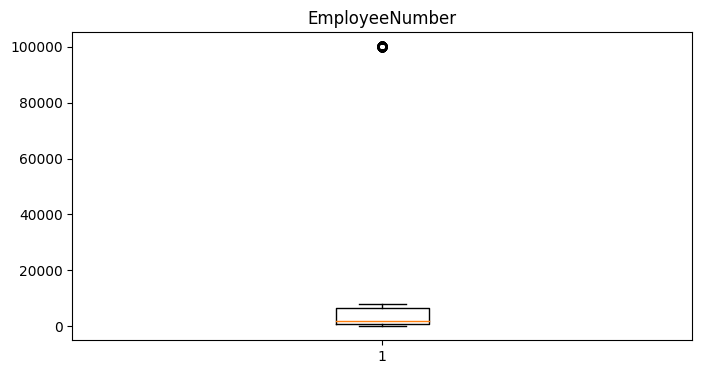

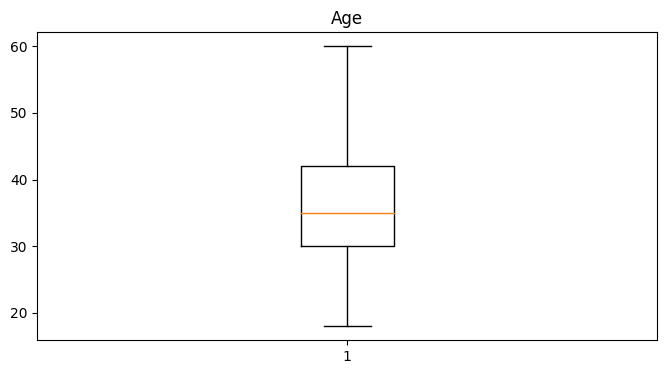

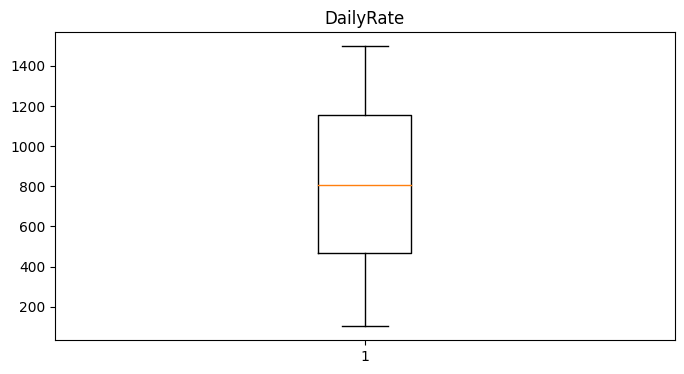

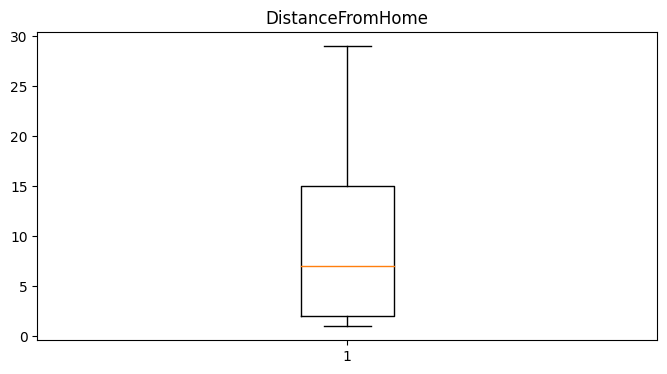

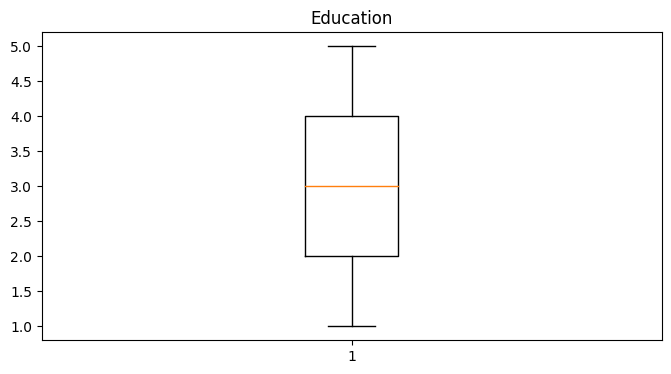

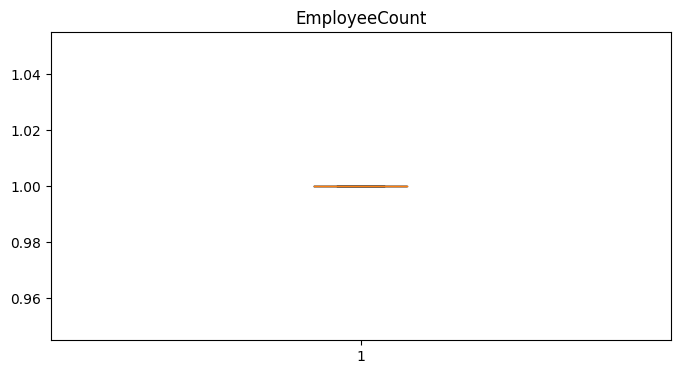

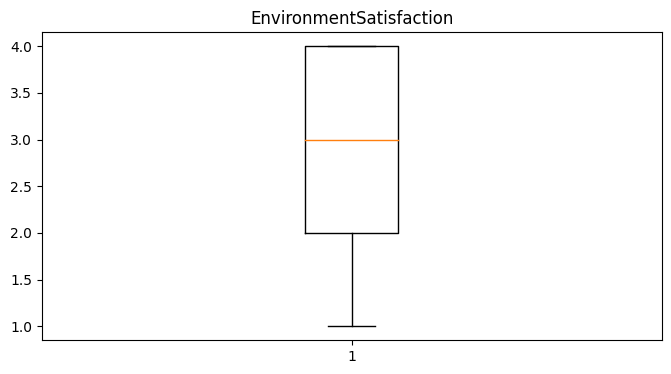

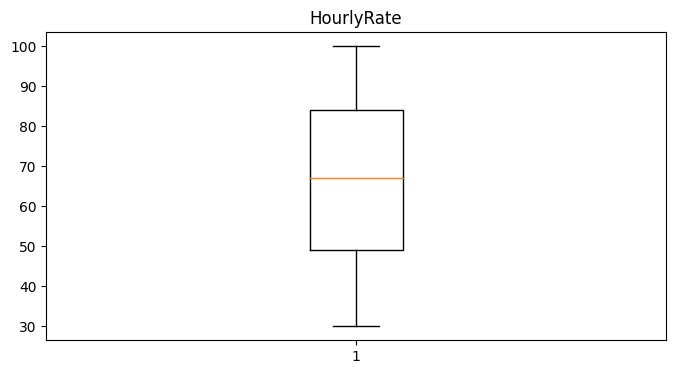

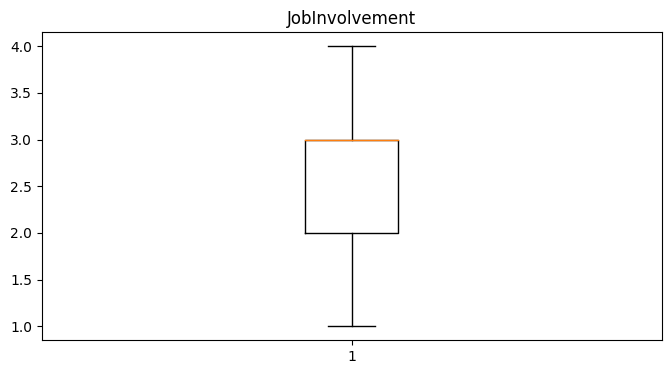

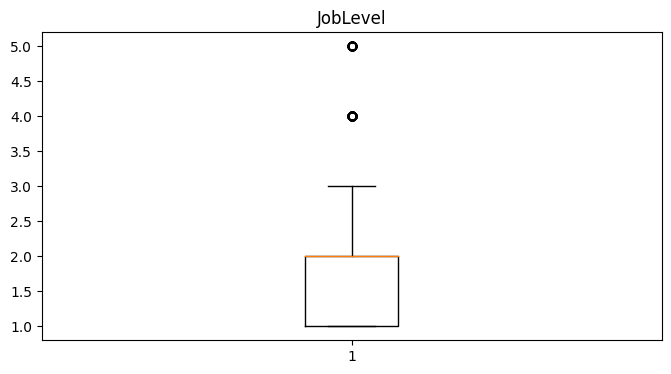

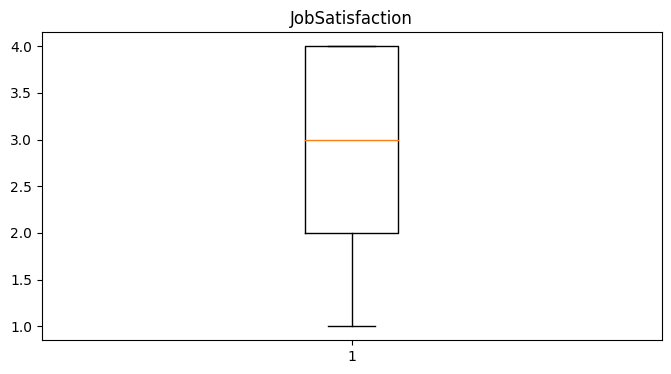

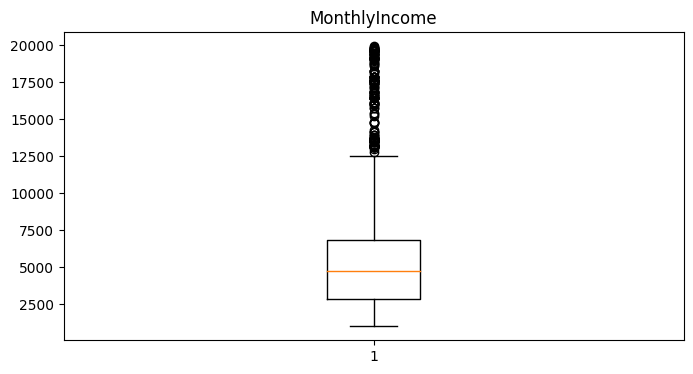

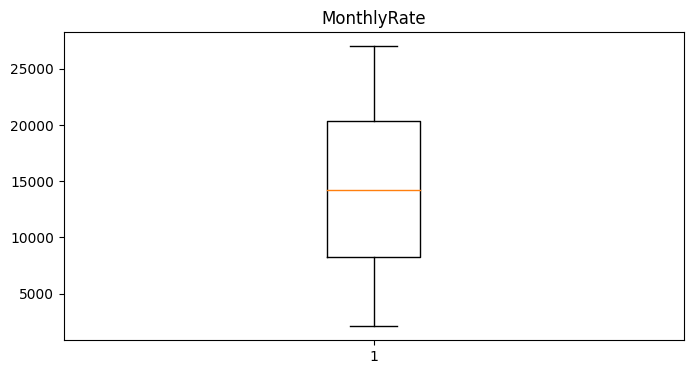

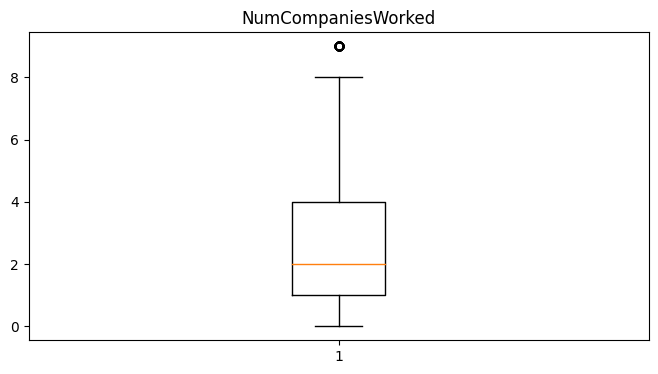

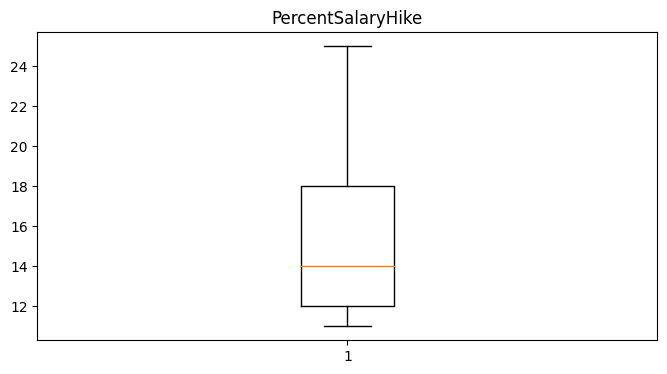

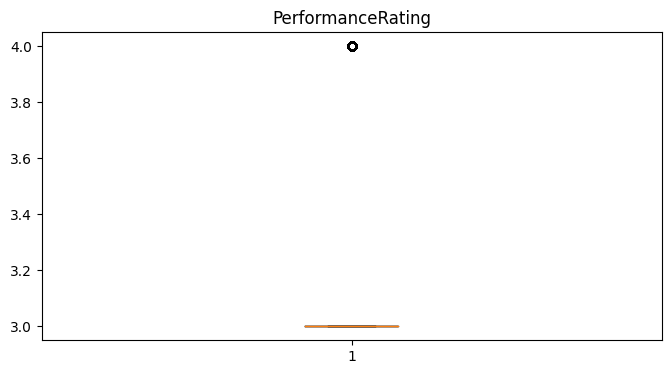

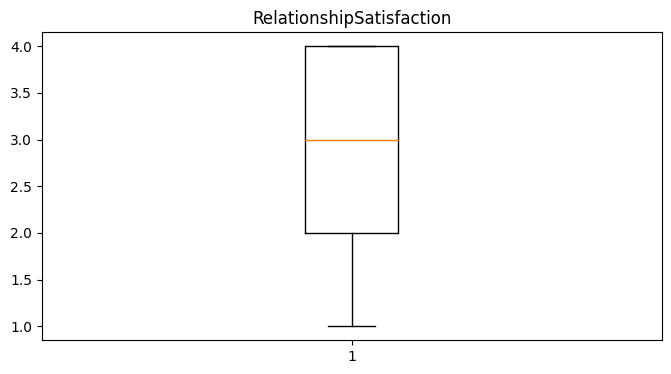

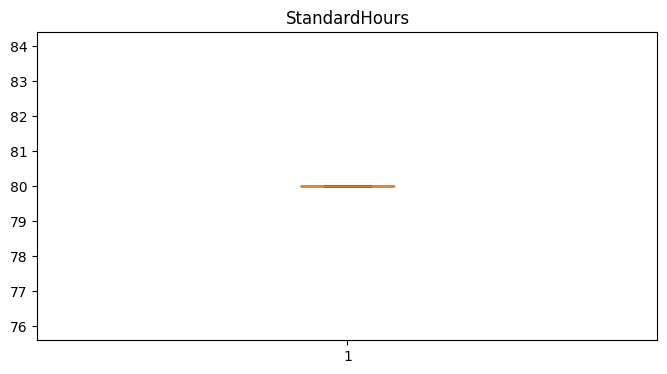

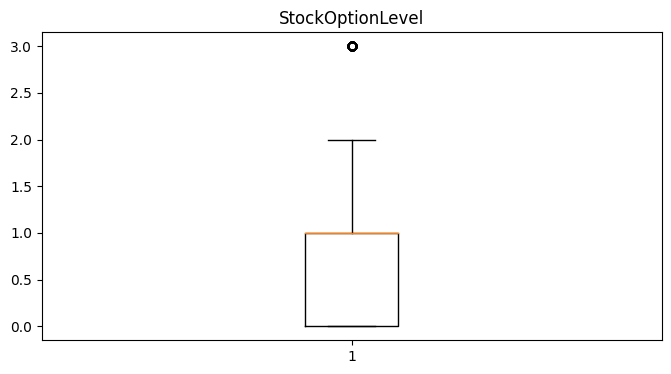

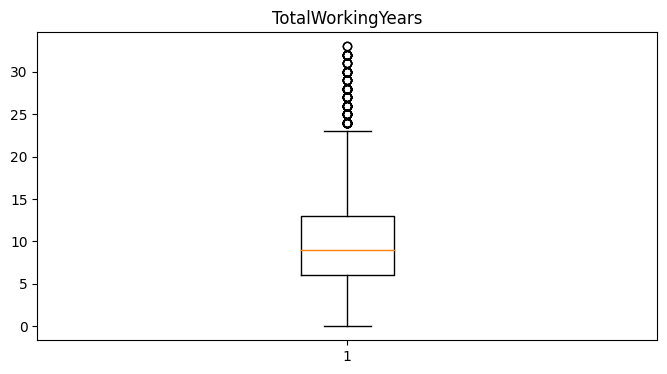

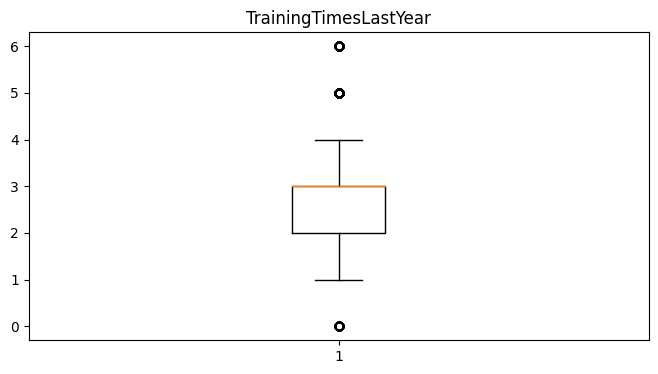

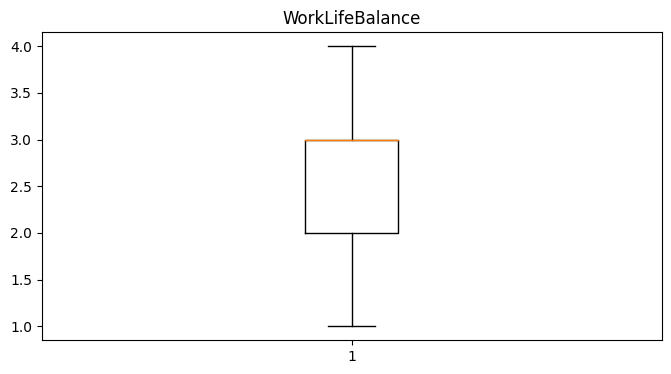

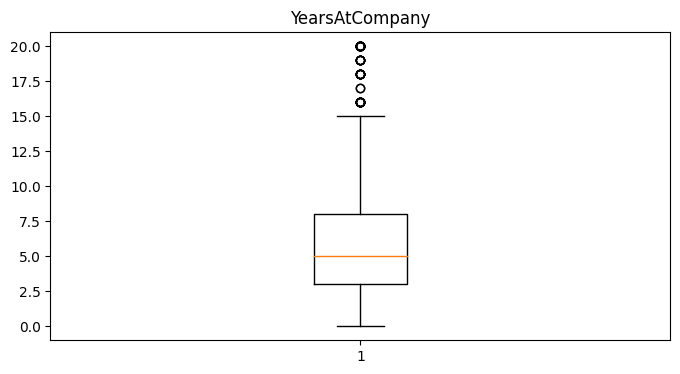

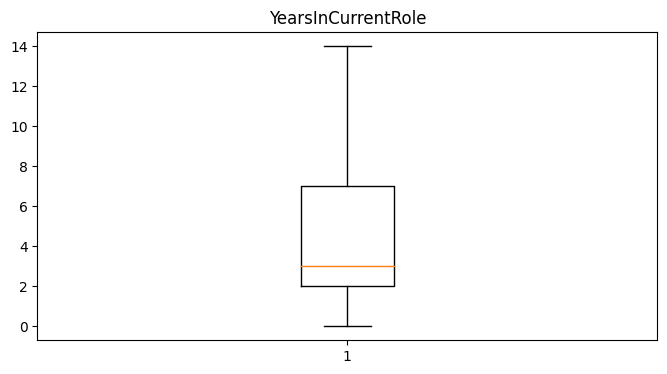

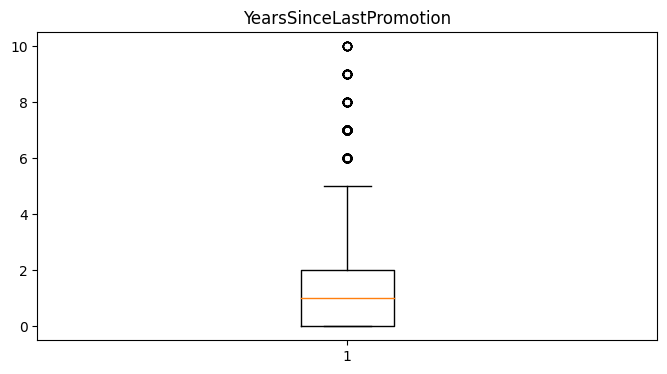

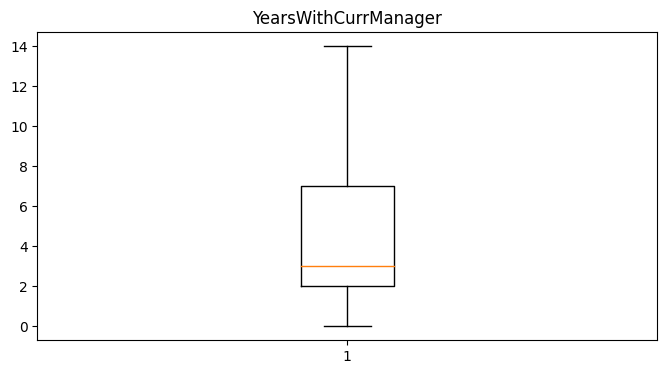

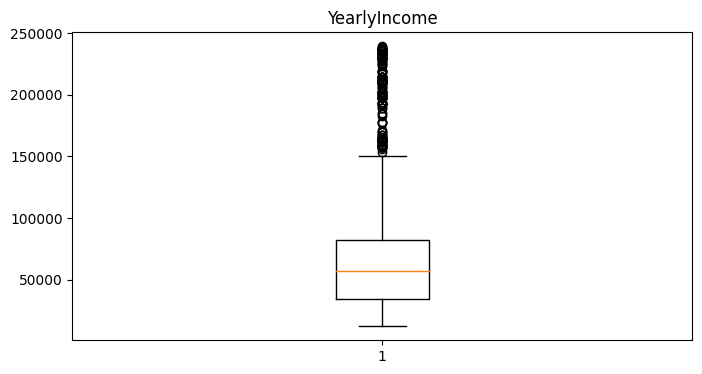

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Twój DataFrame zawierający wymienione kolumny

# Lista kolumn, dla których chcesz wykonać wykres pudełkowy
columns_to_plot = [ 'EmployeeNumber',	'Age',	'DailyRate',	'DistanceFromHome',	'Education',	
                   'EmployeeCount',	'EnvironmentSatisfaction',	'HourlyRate',	'JobInvolvement',	
                   'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	
                   'PercentSalaryHike',	'PerformanceRating',	'RelationshipSatisfaction',	'StandardHours',	
                   'StockOptionLevel',	'TotalWorkingYears',	'TrainingTimesLastYear',	'WorkLifeBalance',	
                   'YearsAtCompany',	'YearsInCurrentRole',	'YearsSinceLastPromotion',	'YearsWithCurrManager',	
                   'YearlyIncome']

# Wykres pudełkowy dla każdej kolumny
for column in columns_to_plot:
    plt.figure(figsize=(8, 4))  # Rozmiar wykresu (opcjonalne)
    plt.boxplot(df_without_outliers[column].dropna())  # Wykres pudełkowy
    plt.title(column)  # Tytuł wykresu
    plt.show()

In [88]:
df = df_without_outliers
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [89]:
# EmployeeNumber',	'Age',	'DailyRate',	'DistanceFromHome',	'Education',	
#                    'EmployeeCount',	'EnvironmentSatisfaction',	'HourlyRate',	'JobInvolvement',	
#                    'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	
#                    'PercentSalaryHike',	'PerformanceRating',	'RelationshipSatisfaction',	'StandardHours',	
#                    'StockOptionLevel',	'TotalWorkingYears',	'TrainingTimesLastYear',	'WorkLifeBalance',	
#                    'YearsAtCompany',	'YearsInCurrentRole',	'YearsSinceLastPromotion',	'YearsWithCurrManager',	
#                    'YearlyIncome'

In [90]:
df.describe(include='all')

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
count,2288.000000,2288.000000,2288,2288.000000,2288,2288.000000,2288.000000,2288,2288.0,2288.000000,2288,2288.000000,2288.000000,2288.000000,2288,2288.00000,2288,2288.000000,2288.000000,2288.000000,2288,2288,2288.000000,2288.000000,2288.000000,2288.0,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2288.000000,2149,2288.000000
unique,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
freq,NaN,NaN,1649,NaN,1519,NaN,NaN,933,NaN,NaN,1395,NaN,NaN,NaN,520,NaN,1073,NaN,NaN,NaN,2288,1650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1321,NaN
mean,9278.322552,36.163024,NaN,804.267483,NaN,9.381556,2.896416,NaN,1.0,2.719406,NaN,66.386801,2.752622,1.907343,NaN,2.74257,NaN,5840.963287,14282.182692,2.663024,NaN,NaN,15.220280,3.147727,2.743007,80.0,0.772727,9.997378,2.791958,2.778409,5.798077,3.777098,1.594843,3.722902,NaN,70091.559441
std,23254.503920,8.799774,NaN,399.736746,NaN,8.176398,1.024930,NaN,0.0,1.081679,NaN,20.063701,0.698548,0.950998,NaN,1.09524,NaN,4026.757291,7009.043772,2.482927,NaN,NaN,3.569105,0.354907,1.079054,0.0,0.836377,6.407458,1.322995,0.716064,4.168233,3.168102,2.204600,3.189697,NaN,48321.087488
min,1.000000,18.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.00000,NaN,1009.000000,2097.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,12108.000000
25%,973.500000,30.000000,NaN,468.750000,NaN,2.000000,2.000000,NaN,1.0,2.000000,NaN,49.000000,2.000000,1.000000,NaN,2.00000,NaN,2849.250000,8295.750000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,NaN,34191.000000
50%,1955.500000,35.000000,NaN,806.000000,NaN,7.000000,3.000000,NaN,1.0,3.000000,NaN,67.000000,3.000000,2.000000,NaN,3.00000,NaN,4724.000000,14174.000000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,NaN,56688.000000
75%,6577.750000,42.000000,NaN,1153.000000,NaN,15.000000,4.000000,NaN,1.0,4.000000,NaN,84.000000,3.000000,2.000000,NaN,4.00000,NaN,6815.000000,20329.750000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,13.000000,3.000000,3.000000,8.000000,7.000000,2.000000,7.000000,NaN,81780.000000


In [91]:
dict_BusinessTravel = {'Travel_Rarely': 1 , 'Travel_Frequently': 2, 'Non-Travel': 0}
df['BusinessTravel'] = df['BusinessTravel'].map(dict_BusinessTravel)



In [92]:
df['JobRole'].unique()

array(['Laboratory Technician', 'Manufacturing Director',
       'Research Scientist', 'Human Resources', 'Research Director',
       'Sales Representative', 'Manager', 'Healthcare Representative',
       'Sales Executive'], dtype=object)

In [93]:
dict_JobRole = {'Manager': 0, 'Manufacturing Director': 0, 
                'Healthcare Representative': 1, 
                'Laboratory Technician': 2,  'Research Director': 2, 
                'Research Scientist': 3, 'Sales Executive': 3,
                'Human Resources': 4, 'Sales Representative': 4 , 
       }
df['JobRole'] = df['JobRole'].map(dict_JobRole)


In [94]:
df['MaritalStatus'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [95]:
temp = pd.get_dummies(df['MaritalStatus'],drop_first=True)
df = pd.concat([df, temp], axis=1)
df.drop("MaritalStatus", axis=1, inplace=True)

In [96]:
df['Attrition'].unique()

array(['No', 'Yes', nan], dtype=object)

In [97]:
dict_Attrition = {'Yes': 1, 'No': 0}
df['Attrition'] = df['Attrition'].map(dict_Attrition)

In [98]:
df

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,Married,Single
0,104,30.0,1,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,2,4.0,5126.0,15998.0,1.0,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,0.0,61512.0,True,False
1,1638,38.0,1,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,0,3.0,7756.0,14199.0,3.0,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,0.0,93072.0,True,False
2,164,26.0,1,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,3,2.0,2368.0,23300.0,1.0,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,0.0,28416.0,True,False
3,395,28.0,1,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,3,4.0,3310.0,4488.0,1.0,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,0.0,39720.0,False,True
4,53,35.0,1,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,2,4.0,1951.0,10910.0,1.0,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,23412.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4425,7956,29.0,1,1210.0,Sales,2.0,3.0,Medical,1.0,1.0,Male,78.0,2.0,2.0,3,2.0,6644.0,3687.0,2.0,Y,No,19.0,3.0,2.0,80.0,2.0,10.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,79728.0,True,False
4426,7957,29.0,1,1210.0,Sales,2.0,3.0,Medical,1.0,1.0,Male,78.0,2.0,2.0,3,2.0,6644.0,3687.0,2.0,Y,No,19.0,3.0,2.0,80.0,2.0,10.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,79728.0,True,False
4427,7958,29.0,1,1210.0,Sales,2.0,3.0,Medical,1.0,1.0,Male,78.0,2.0,2.0,3,2.0,6644.0,3687.0,2.0,Y,No,19.0,3.0,2.0,80.0,2.0,10.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,79728.0,True,False
4431,7962,55.0,1,725.0,Research & Development,2.0,3.0,Medical,1.0,4.0,Male,78.0,3.0,5.0,0,1.0,19859.0,21199.0,5.0,Y,Yes,13.0,3.0,4.0,80.0,1.0,24.0,2.0,3.0,5.0,2.0,1.0,4.0,1.0,238308.0,True,False


In [99]:
df.groupby('Department')['Attrition'].mean()

Department
Human Resources           0.464286
Research & Development    0.367089
Sales                     0.415241
Name: Attrition, dtype: float64

In [100]:
dict_Department = {'Human Resources': 2, 'Sales': 1, 'Research & Development': 0 }
df['Department'] = df['Department'].map(dict_Department)

In [101]:
df.groupby('EducationField')['Attrition'].mean()

EducationField
Human Resources     0.472222
Life Sciences       0.359818
Marketing           0.405530
Medical             0.375187
Other               0.403101
Technical Degree    0.474654
Name: Attrition, dtype: float64

In [102]:
dict_EducationField = {'LifeSciences': 1, 'Medical': 1,
                       'Other': 2, 'Marketing': 2,
                       'Human Resources': 3, 'Technical Degre': 3,
                       }
df['EducationField'] = df['EducationField'].map(dict_EducationField)

In [103]:
df["EducationField"] = df["EducationField"].fillna(0)
df["EducationField"].unique()

array([0., 1., 2., 3.])

In [104]:
temp = pd.get_dummies(df['Gender'],drop_first=True)
df = pd.concat([df, temp], axis=1)
df.drop("Gender", axis=1, inplace=True)

In [105]:
df["Over18"].unique()

array(['Y'], dtype=object)

In [106]:
df.shape

(2288, 37)

In [107]:
df["Over18"] = df["Over18"] == "Y"

In [108]:
df.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,Married,Single,Male
0,104,30.0,1,852.0,0,1.0,1.0,0.0,1.0,4.0,55.0,2.0,2.0,2,4.0,5126.0,15998.0,1.0,True,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,0.0,61512.0,True,False,True
1,1638,38.0,1,397.0,0,2.0,2.0,1.0,1.0,4.0,54.0,2.0,3.0,0,3.0,7756.0,14199.0,3.0,True,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,0.0,93072.0,True,False,False
2,164,26.0,1,841.0,0,6.0,3.0,2.0,1.0,3.0,46.0,2.0,1.0,3,2.0,2368.0,23300.0,1.0,True,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,0.0,28416.0,True,False,False
3,395,28.0,1,1117.0,0,8.0,2.0,0.0,1.0,4.0,66.0,3.0,1.0,3,4.0,3310.0,4488.0,1.0,True,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,0.0,39720.0,False,True,False
4,53,35.0,1,464.0,0,4.0,2.0,2.0,1.0,3.0,75.0,3.0,1.0,2,4.0,1951.0,10910.0,1.0,True,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,23412.0,False,False,True


In [109]:
df["OverTime"] = df["OverTime"] == "Yes"

In [110]:
df.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,Married,Single,Male
0,104,30.0,1,852.0,0,1.0,1.0,0.0,1.0,4.0,55.0,2.0,2.0,2,4.0,5126.0,15998.0,1.0,True,True,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,0.0,61512.0,True,False,True
1,1638,38.0,1,397.0,0,2.0,2.0,1.0,1.0,4.0,54.0,2.0,3.0,0,3.0,7756.0,14199.0,3.0,True,True,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,0.0,93072.0,True,False,False
2,164,26.0,1,841.0,0,6.0,3.0,2.0,1.0,3.0,46.0,2.0,1.0,3,2.0,2368.0,23300.0,1.0,True,False,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,0.0,28416.0,True,False,False
3,395,28.0,1,1117.0,0,8.0,2.0,0.0,1.0,4.0,66.0,3.0,1.0,3,4.0,3310.0,4488.0,1.0,True,False,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,0.0,39720.0,False,True,False
4,53,35.0,1,464.0,0,4.0,2.0,2.0,1.0,3.0,75.0,3.0,1.0,2,4.0,1951.0,10910.0,1.0,True,False,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,23412.0,False,False,True


## Modeling :)

In [111]:
df_train = df.dropna()
df_target = df[df.isna().any(axis=1)]

In [112]:
import pandas as pd
import matplotlib.ticker as ticker

def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'ML-datasets/{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

def prepare_dataset(dataset_name):
    params = {'iris': {'class_column': 'species', 'index_col': None},
              'wine': {'class_column': 'Class', 'index_col': None},
              'glass': {'class_column': 'Type', 'index_col': 'ID'}}
    dataset, classes = load_dataset(dataset_name,
                                    **params[dataset_name])
    y = dataset.pop('class')
    X = dataset
    return X, y, classes


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

def calculate_metrics(target, prediction, average='macro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

def plot_confusion_matrix(cm, classes, title=None, title_appendix = '', cmap = plt.cm.Blues):

    if title_appendix:
        title_appendix = f'({title_appendix})'

    if title is None:
        title = f'Confusion Matrix {title_appendix}'

    fig, ax = plt.subplots(figsize = (10,5))

    img = ax.imshow(cm, cmap = cmap)

    ax.figure.colorbar(img, ax = ax)

    # Określanie lokalizacji ticków
    ticks = np.arange(len(classes))
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)

    # Ustawienie lokalizatora
    ax.xaxis.set_major_locator(ticker.FixedLocator(ticks))
    ax.yaxis.set_major_locator(ticker.FixedLocator(ticks))

    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

    fmt = '.2f' if cm.dtype =='float' else 'd'

    for y, row in enumerate(cm):
        for x, cell in enumerate(row):
            ax.text(x,y, format(cell, fmt), ha ='center', color = 'white' if cell > cm.max()/2 else 'black')

    # Teraz możemy bezpiecznie użyć set_xticklabels() i set_yticklabels()
    ax.set_xticklabels(classes, rotation = 90)
    ax.set_yticklabels(classes, rotation = 0)

    return ax

def normalize_confusion_matrix(confusion_matrix):
    return confusion_matrix.astype('float') /confusion_matrix.sum(axis = 1)[np.newaxis].T

In [113]:
df.shape

(2288, 37)

In [114]:
df_train.shape

(2149, 37)

In [115]:
df_target.shape

(139, 37)

In [116]:
df_train.isna().sum()

EmployeeNumber              0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
YearlyInco

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_train.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [118]:
df_train.columns.values

array(['EmployeeNumber', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'YearlyIncome', 'Married',
       'Single', 'Male'], dtype=object)

In [119]:
X = df_train[['EmployeeNumber', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'YearlyIncome', 'Married',
       'Single', 'Male']]
y = df_train['Attrition']

In [120]:
df.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,Married,Single,Male
0,104,30.0,1,852.0,0,1.0,1.0,0.0,1.0,4.0,55.0,2.0,2.0,2,4.0,5126.0,15998.0,1.0,True,True,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,0.0,61512.0,True,False,True
1,1638,38.0,1,397.0,0,2.0,2.0,1.0,1.0,4.0,54.0,2.0,3.0,0,3.0,7756.0,14199.0,3.0,True,True,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,0.0,93072.0,True,False,False
2,164,26.0,1,841.0,0,6.0,3.0,2.0,1.0,3.0,46.0,2.0,1.0,3,2.0,2368.0,23300.0,1.0,True,False,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,0.0,28416.0,True,False,False
3,395,28.0,1,1117.0,0,8.0,2.0,0.0,1.0,4.0,66.0,3.0,1.0,3,4.0,3310.0,4488.0,1.0,True,False,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,0.0,39720.0,False,True,False
4,53,35.0,1,464.0,0,4.0,2.0,2.0,1.0,3.0,75.0,3.0,1.0,2,4.0,1951.0,10910.0,1.0,True,False,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0.0,23412.0,False,False,True


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

NameError: name 'train_test_split' is not defined

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 4, 6],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [2, 4, 6]
}

# Create the Random Forest classifier
rf = RandomForestClassifier()

# Create the grid search object
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X, y)

# Get the best estimator and its corresponding parameters
best_rf = grid_search.best_estimator_
print('Best Params: ', grid_search.best_params_)

# Fit the best estimator on the training data
best_rf.fit(X, y)

# Predict on the training and test data using the best estimator
y_pred_train = best_rf.predict(X)

# y_pred = best_rf.predict(X_test)

Best Params:  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'n_estimators': 100}


In [129]:
print_results(calculate_metrics(y, y_pred_train))

Results for classifier
----
  Accuracy:  0.6384364820846905
  Precision: 0.6902575710123471
  Recall:    0.5366565550179743
  F1 score:  0.46732215153267787
  Mislabeled 777 out of 2149




In [ ]:
best_rf

In [ ]:
best_params

In [ ]:
from sklearn.metrics import confusion_matrix
print_results(calculate_metrics(y_train, y_pred_train))
print_results(calculate_metrics(y_test, y_pred))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import Rand
from sklearn.tree import plot_tree

In [ ]:
model = DecisionTreeClassifier()

y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print_results(calculate_metrics(y_train, y_pred_train))
print_results(calculate_metrics(y_test, y_pred))

plot_confusion_matrix(confusion_matrix(y_train, y_pred_train), wine_classes, title_appendix = 'train');
plot_confusion_matrix(confusion_matrix(y_test, y_pred), wine_classes, title_appendix = 'test');